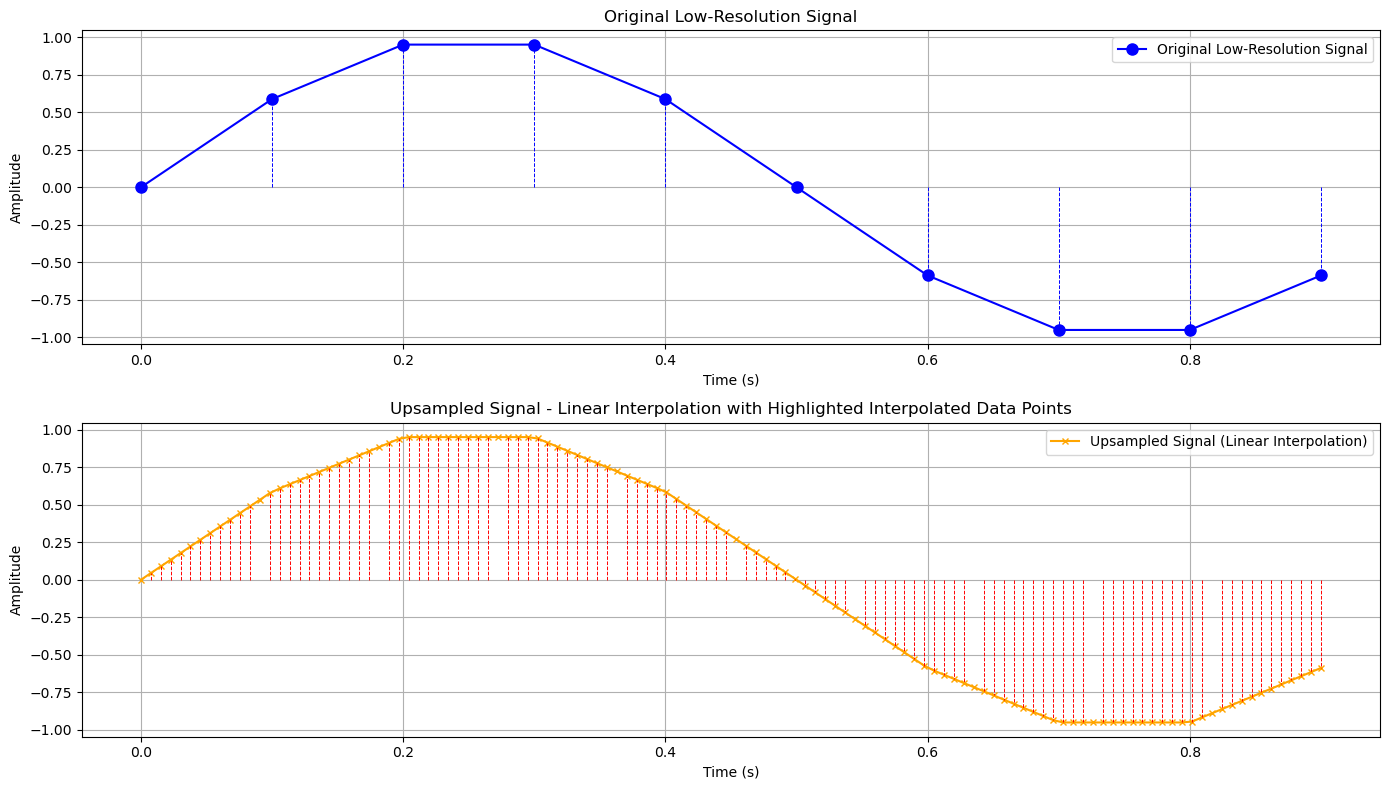

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate a low-resolution sine wave as the original signal
fs_low = 10  # Low sampling frequency for fewer data points
t_low = np.linspace(0, 1, fs_low, endpoint=False)  # Time vector for 1 second
f_sine = 1  # Frequency of sine wave (Hz)
original_signal_low = np.sin(2 * np.pi * f_sine * t_low)


# Upsampling Factor
L = 12# Upsampling factor for more interpolated points

# Linear Interpolation for Upsampling
def upsample_linear(signal, L):
    # Original time points
    t_original = np.arange(len(signal))
    # New time points with upsampled frequency
    t_upsampled = np.linspace(0, len(signal) - 1, L * len(signal))
    # Interpolation function
    interpolator = interp1d(t_original, signal, kind='linear')
    upsampled_signal = interpolator(t_upsampled)
    return t_upsampled, upsampled_signal


# Perform upsampling using linear interpolation
t_upsampled, upsampled_signal_linear = upsample_linear(original_signal_low, L)

# Plotting the original and upsampled signals with data points marked and connected to x-axis
plt.figure(figsize=(14, 8))

# Original Low-Resolution Signal
plt.subplot(2, 1, 1)
plt.plot(t_low, original_signal_low, 'o-', label="Original Low-Resolution Signal", markersize=8, color='blue')
# Adding horizontal lines from each data point to the x-axis
for i in range(len(t_low)):
    plt.plot([t_low[i], t_low[i]], [0, original_signal_low[i]], 'b--', linewidth=0.7)
plt.legend()
plt.title("Original Low-Resolution Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)



# Upsampled Signal with Linear Interpolation
plt.subplot(2, 1, 2)
# Plot upsampled signal with interpolated points in orange
plt.plot(t_upsampled / fs_low, upsampled_signal_linear, 'x-', color='orange', label="Upsampled Signal (Linear Interpolation)", markersize=5)
# Highlighting interpolated points with horizontal lines from x-axis
for i in range(len(t_upsampled)):
    if i % L != 0:  # Only plot lines for interpolated points
        plt.plot([t_upsampled[i] / fs_low, t_upsampled[i] / fs_low], [0, upsampled_signal_linear[i]], 'r--', linewidth=0.7)
plt.legend()
plt.title("Upsampled Signal - Linear Interpolation with Highlighted Interpolated Data Points")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()



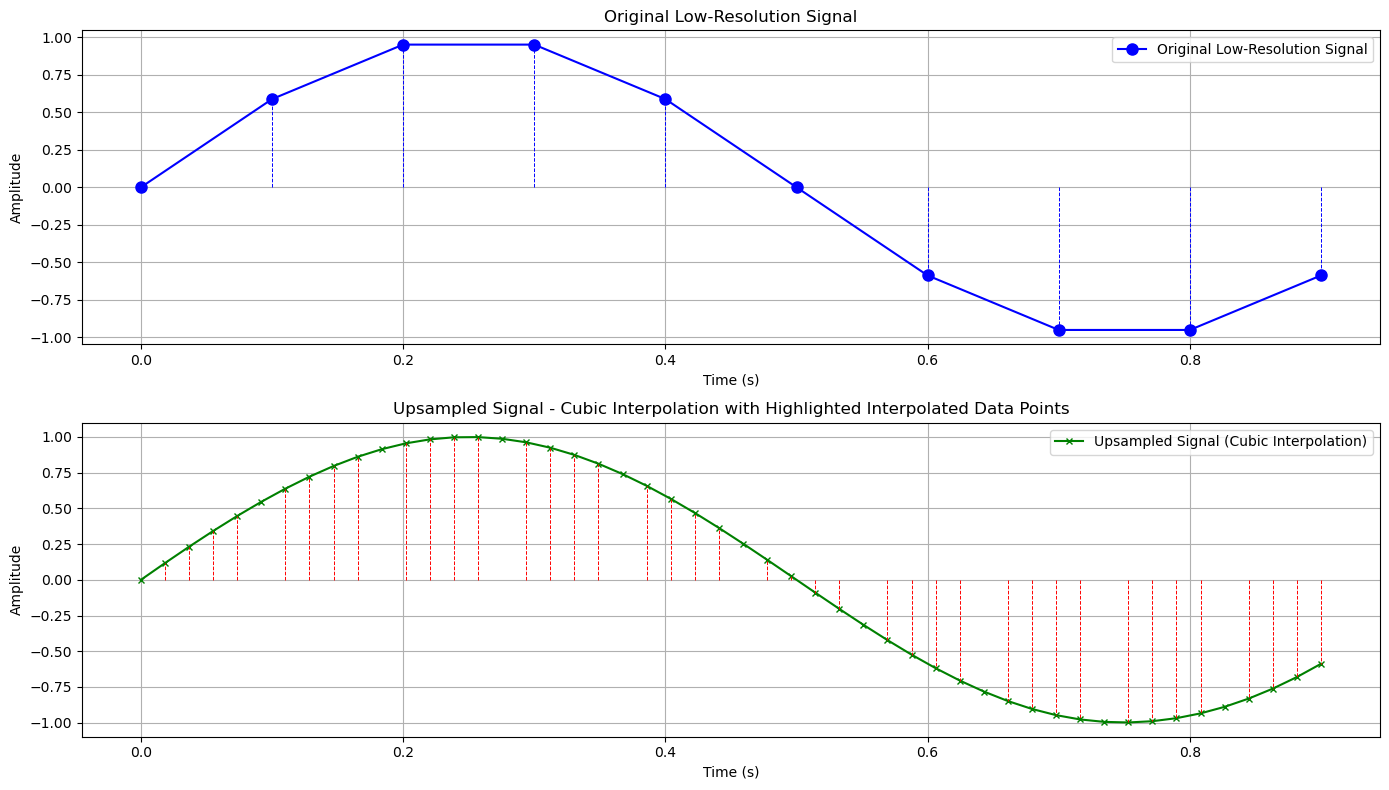

In [4]:
# Cubic Interpolation for Upsampling
def upsample_cubic(signal, L):
    # Original time points
    t_original = np.arange(len(signal))
    # New time points with upsampled frequency
    t_upsampled = np.linspace(0, len(signal) - 1, L * len(signal))
    # Interpolation function
    interpolator = interp1d(t_original, signal, kind='cubic')
    upsampled_signal = interpolator(t_upsampled)
    return t_upsampled, upsampled_signal

# Perform upsampling using cubic interpolation
t_upsampled_cubic, upsampled_signal_cubic = upsample_cubic(original_signal_low, L)

# Plotting the original and upsampled signals with data points marked and connected to x-axis
plt.figure(figsize=(14, 8))

# Original Low-Resolution Signal
plt.subplot(2, 1, 1)
plt.plot(t_low, original_signal_low, 'o-', label="Original Low-Resolution Signal", markersize=8, color='blue')
# Adding horizontal lines from each data point to the x-axis
for i in range(len(t_low)):
    plt.plot([t_low[i], t_low[i]], [0, original_signal_low[i]], 'b--', linewidth=0.7)
plt.legend()
plt.title("Original Low-Resolution Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Upsampled Signal with Cubic Interpolation
plt.subplot(2, 1, 2)
# Plot upsampled signal with interpolated points in green
plt.plot(t_upsampled_cubic / fs_low, upsampled_signal_cubic, 'x-', color='green', label="Upsampled Signal (Cubic Interpolation)", markersize=5)
# Highlighting interpolated points with horizontal lines from x-axis
for i in range(len(t_upsampled_cubic)):
    if i % L != 0:  # Only plot lines for interpolated points
        plt.plot([t_upsampled_cubic[i] / fs_low, t_upsampled_cubic[i] / fs_low], [0, upsampled_signal_cubic[i]], 'r--', linewidth=0.7)
plt.legend()
plt.title("Upsampled Signal - Cubic Interpolation with Highlighted Interpolated Data Points")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


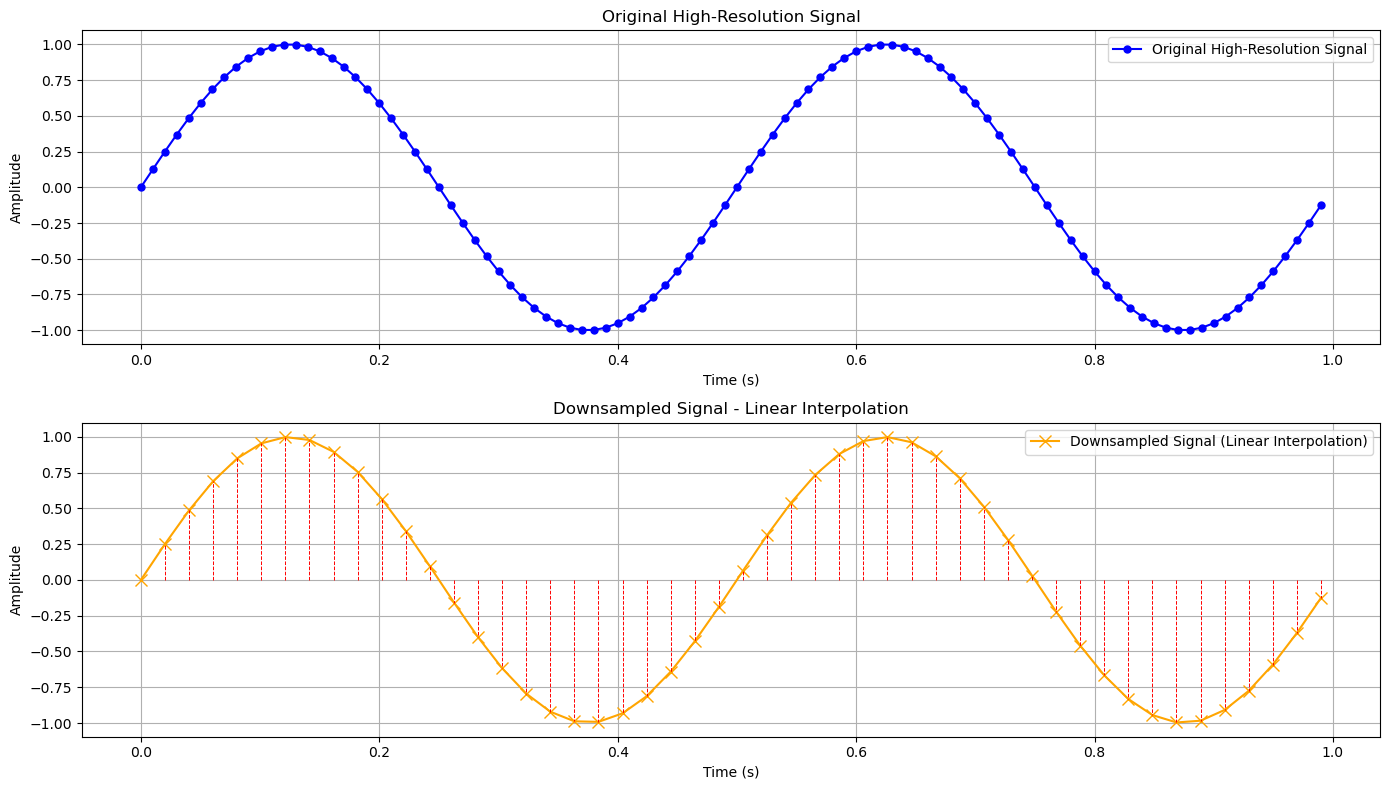

In [19]:
# now we will see downsampling of sine curve 
# with lineaar interpolation method
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate a high-resolution sine wave as the original signal
fs_high = 100  # Higher sampling frequency for more data points
t_high = np.linspace(0, 1, fs_high, endpoint=False)  # Time vector for 1 second
f_sine = 2  # Frequency of sine wave (Hz)
original_signal_high = np.sin(2 * np.pi * f_sine * t_high)

# Downsampling Factor
M = 2 # Downsampling factor for fewer points

# Linear Interpolation for Downsampling
def downsample_linear(signal, M):
    # Original time points
    t_original = np.arange(len(signal))
    # New downsampled time points
    t_downsampled = np.linspace(0, len(signal) - 1, len(signal) // M)
    # Interpolation function
    interpolator = interp1d(t_original, signal, kind='linear')
    downsampled_signal = interpolator(t_downsampled)
    return t_downsampled, downsampled_signal

# Perform downsampling using linear interpolation
t_downsampled_linear, downsampled_signal_linear = downsample_linear(original_signal_high, M)

# Plotting the original and downsampled signals
plt.figure(figsize=(14, 8))

# Original High-Resolution Signal
plt.subplot(2, 1, 1)
plt.plot(t_high, original_signal_high, 'o-', label="Original High-Resolution Signal", markersize=5, color='blue')
plt.legend()
plt.title("Original High-Resolution Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Downsampled Signal with Linear Interpolation
plt.subplot(2, 1, 2)
t_downsampled_normalized = t_downsampled_linear / fs_high  # Normalize time for plot
plt.plot(t_downsampled_normalized, downsampled_signal_linear, 'x-', color='orange', label="Downsampled Signal (Linear Interpolation)", markersize=8)
# Highlighting each downsampled point with a line to the x-axis
for i in range(len(t_downsampled_normalized)):
    plt.plot([t_downsampled_normalized[i], t_downsampled_normalized[i]], [0, downsampled_signal_linear[i]], 'r--', linewidth=0.7)
plt.legend()
plt.title("Downsampled Signal - Linear Interpolation")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


<!-- now with image -->


In [1]:
# now for image 
!pip install opencv-python


In [2]:
import cv2
import matplotlib.pyplot as plt

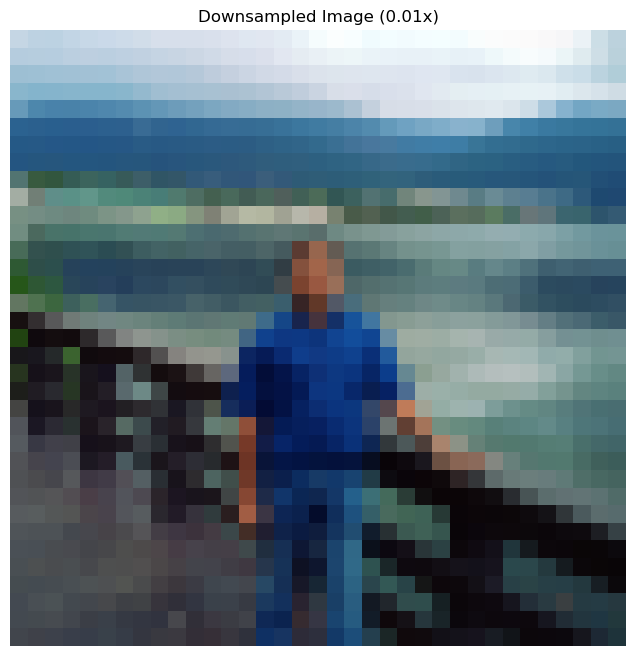

In [34]:
import cv2
import matplotlib.pyplot as plt

# Use a raw string for the file path
image_path =r"C:\Users\Sapna Mishra\Desktop\tarak mehta ka oolta.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to RGB for correct display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Downsampling: Decrease image size by 0.05x using area interpolation
    downsampled_image = cv2.resize(image_rgb, None, fx=0.07, fy=0.07, interpolation=cv2.INTER_AREA)
    
    # Display the downsampled image
    plt.figure(figsize=(8, 8))
    plt.imshow(downsampled_image)
    plt.title("Downsampled Image (0.01x)")
    plt.axis('off')
    plt.show()


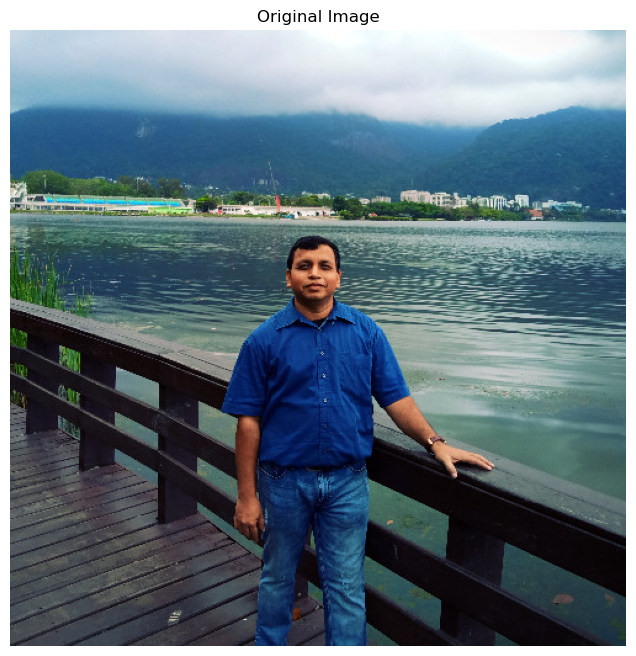

In [29]:
import cv2
import matplotlib.pyplot as plt

# Use a raw string for the file path
image_path = r"C:\Users\Sapna Mishra\Desktop\tarak mehta ka oolta.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to RGB for correct display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


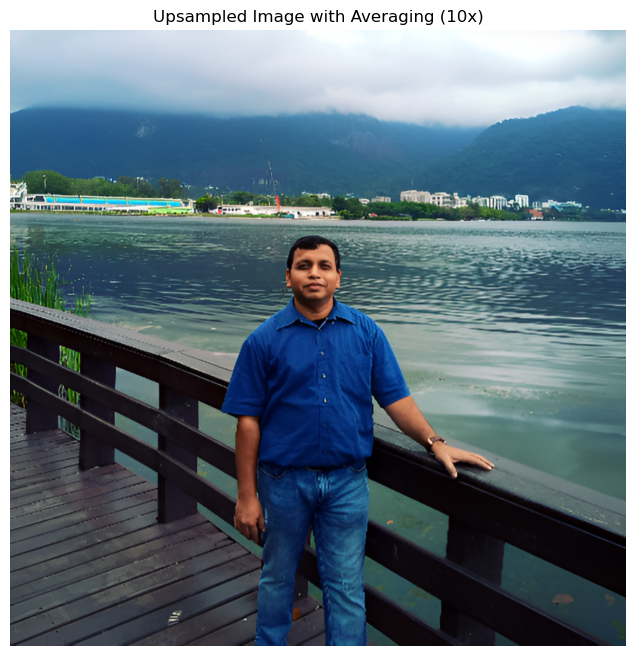

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Use a raw string for the file path
image_path =r"C:\Users\Sapna Mishra\Desktop\tarak mehta ka oolta..jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to RGB for correct display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Upsampling: Increase image size by 10x using linear interpolation
    upsampled_image = cv2.resize(image_rgb, None, fx=10, fy=10, interpolation=cv2.INTER_LINEAR)
    
    # Apply an averaging filter to smooth the upsampled image
    kernel_size = (5, 5)  # The size of the kernel for averaging
    smoothed_image = cv2.blur(upsampled_image, kernel_size)
    
    # Display the upsampled image with averaging
    plt.figure(figsize=(8, 8))
    plt.imshow(smoothed_image)
    plt.title("Upsampled Image with Averaging (10x)")
    plt.axis('off')
    plt.show()
    # 

